In [2]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

In [3]:
trial_num = 1
model_num = 1
tissue_num = 27
check_t_num = 27

ensg_name = json.load(open('whole_ensg2name.json'))
name_rsqr = json.load(open('rand1000_name2rsqr.json'))

gene_data_name = 'UTMOST_rand1000'
gene_list = os.listdir('../%s/'%gene_data_name)

gene_idx_match = np.load('../%s_matching.npy'%gene_data_name)

r_list = []
r_ref_list = []
gene_name_list = []
for g in range(850):
    gene_num = g+1
    gene_name = gene_list[g]

    cor_idx = np.where(gene_idx_match==gene_name)[0]
    gene_num = cor_idx +1

    gene_real_name = ensg_name[gene_name]
    gene_r_score = name_rsqr[gene_real_name]
    r_ref_list.append(gene_r_score)
    gene_name_list.append(gene_real_name)
    
    GX_observed = np.array([])
    GX_predicted = np.array([])
    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        except FileNotFoundError:
            print('gene %d // k%d _ last saved snp2 loaded.'%(gene_num, k+1), '// ', g+1)
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2

    r_list.append(R2)
    
    if g==61:
        print(gene_num)
        print('%s - UTMOST R sqr : %.5f'%(gene_real_name, gene_r_score))
        plt.plot(GX_predicted, GX_observed, 'r*')
        plt.title('[%d]%s : %.5f'%(gene_num, gene_real_name, R2), fontsize=14)
        plt.ylabel('Normalized Observed expression', fontsize=13)
        plt.xlabel('Predicted expression', fontsize=13)
#         plt.savefig('img/trial%d/Scatter_model%d_gene%d.png'%(trial_num, model_num, gene_num))
        plt.show()

gene 663 // k3 _ last saved snp2 loaded. //  2
gene 239 // k3 _ last saved snp2 loaded. //  3
gene 827 // k3 _ last saved snp2 loaded. //  4
gene 202 // k5 _ last saved snp2 loaded. //  6
gene 232 // k4 _ last saved snp2 loaded. //  7
gene 124 // k2 _ last saved snp2 loaded. //  11
gene 148 // k2 _ last saved snp2 loaded. //  13
gene 837 // k3 _ last saved snp2 loaded. //  17
gene 837 // k4 _ last saved snp2 loaded. //  17
gene 497 // k2 _ last saved snp2 loaded. //  18
gene 484 // k2 _ last saved snp2 loaded. //  19
gene 484 // k4 _ last saved snp2 loaded. //  19
gene 370 // k3 _ last saved snp2 loaded. //  21
gene 128 // k5 _ last saved snp2 loaded. //  22
gene 779 // k4 _ last saved snp2 loaded. //  24
gene 193 // k3 _ last saved snp2 loaded. //  25
gene 540 // k5 _ last saved snp2 loaded. //  28
gene 141 // k2 _ last saved snp2 loaded. //  29
gene 764 // k5 _ last saved snp2 loaded. //  30
gene 727 // k2 _ last saved snp2 loaded. //  31
gene 727 // k4 _ last saved snp2 loaded. //  

FileNotFoundError: [Errno 2] No such file or directory: 'npy/trial1/gene913/model1/27tissue_trSNP2_k1_last.npy'

0.0165789779124281 0.02327107435148922


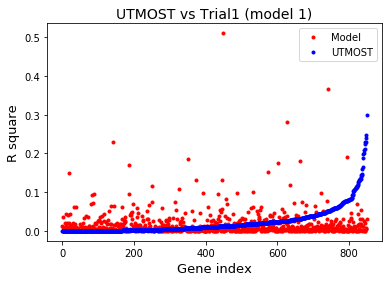

In [7]:
sort_idx = np.argsort(r_list)
avg_model = np.mean(np.array(r_list)[sort_idx])
avg_utmost = np.mean(np.array(r_ref_list)[sort_idx])
print(avg_model, avg_utmost)

plt.title('UTMOST vs Trial%d (model %d)'%(trial_num, model_num), fontsize=14)
plt.plot(np.array(r_ref_list)[sort_idx], 'b.', label='UTMOST')
plt.plot(np.array(r_list)[sort_idx], 'r.', label='Model')
# plt.plot([-1,101],[avg_model, avg_model], 'r--', alpha=0.7)
# plt.plot([-1,101],[avg_utmost, avg_utmost], 'b--', alpha=0.7)
# plt.xticks(np.arange(10),np.arange(10)+1)
plt.xlabel('Gene index', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.legend()
# plt.savefig('img/trial%d/vsUTMOST_model%d.png'%(trial_num, model_num))
plt.show()

0.0165789779124281 0.02327107435148922


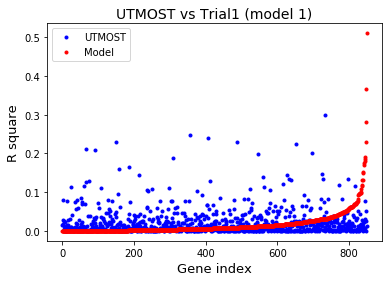

In [8]:
sort_idx = np.argsort(r_list)
avg_model = np.mean(np.array(r_list)[sort_idx])
avg_utmost = np.mean(np.array(r_ref_list)[sort_idx])
print(avg_model, avg_utmost)

plt.title('UTMOST vs Trial%d (model %d)'%(trial_num, model_num), fontsize=14)
plt.plot(np.array(r_ref_list)[sort_idx], 'b.', label='UTMOST')
plt.plot(np.array(r_list)[sort_idx], 'r.', label='Model')
# plt.plot([-1,101],[avg_model, avg_model], 'r--', alpha=0.7)
# plt.plot([-1,101],[avg_utmost, avg_utmost], 'b--', alpha=0.7)
# plt.xticks(np.arange(10),np.arange(10)+1)
plt.xlabel('Gene index', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.legend()
# plt.savefig('img/trial%d/vsUTMOST_model%d.png'%(trial_num, model_num))
plt.show()